## **Train Model without Data pre-prccessing**

### **Loading Dataset & displaying a part of it**

In [ ]:
#Load Dataset
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv(r'/content/drive/MyDrive/NSL-KDD.arff')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


## **Splitting the dataset into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Perform label encoding on categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split the dataset into training and testing sets
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (94479, 41)
Testing data shape: (31493, 41)


### **A) Training the model using DecisionTree, BayesClassification, SVM, KNN and BackPropagation algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create instances of the classifiers
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
backpropagation = MLPClassifier()

# Train the models
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
backpropagation.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = decision_tree.predict(X_test)
nb_predictions = naive_bayes.predict(X_test)
svm_predictions = svm.predict(X_test)
knn_predictions = knn.predict(X_test)
bp_predictions = backpropagation.predict(X_test)

#Calculating the Accuracy Score of each prediction
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
bp_accuracy = accuracy_score(y_test, bp_predictions)

#Printing the Accuracy Score of each prediction
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Backpropagation Accuracy:", bp_accuracy)


Decision Tree Accuracy: 0.9979995554567682
Naive Bayes Accuracy: 0.5300542977804592
SVM Accuracy: 0.5314831867399105
KNN Accuracy: 0.995903851649573
Backpropagation Accuracy: 0.9664052329089003


### **B) Displaying ConfusionMatrix for each model**

Confusion Matrix for Decision Tree
[[14737    36]
 [   27 16693]]



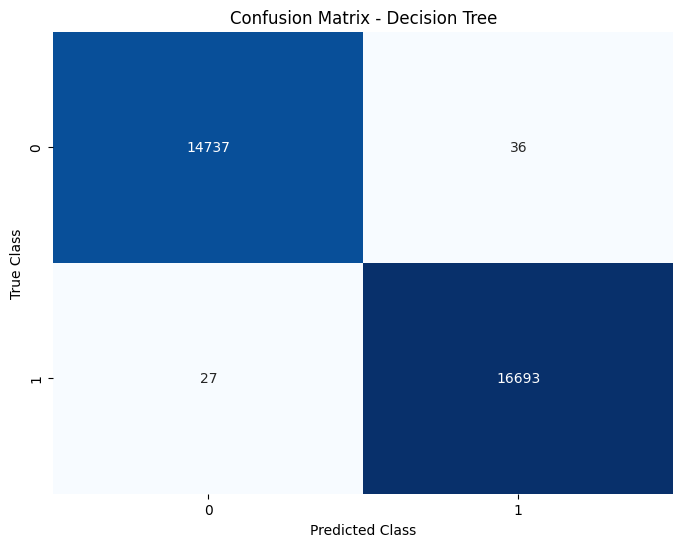

Confusion Matrix for Naive Bayes
[[  245 14528]
 [  272 16448]]



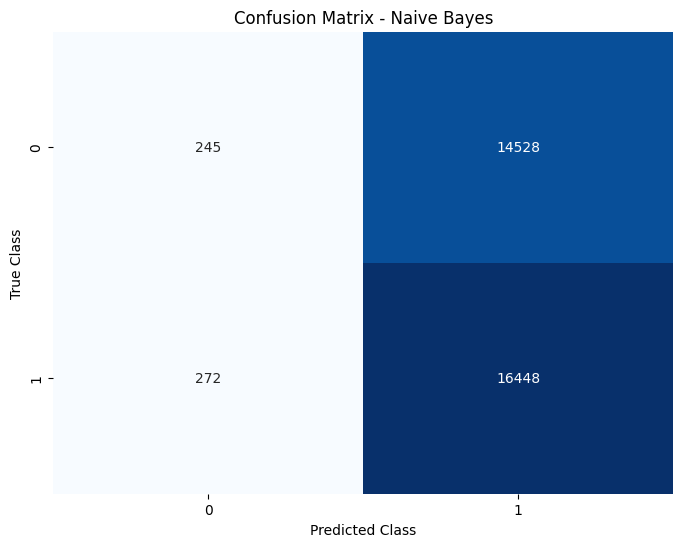

Confusion Matrix for SVM
[[   23 14750]
 [    5 16715]]



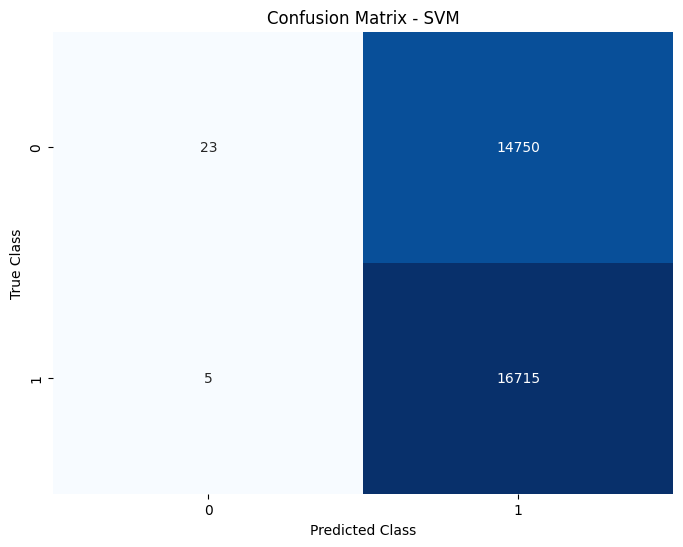

Confusion Matrix for KNN
[[14719    54]
 [   75 16645]]



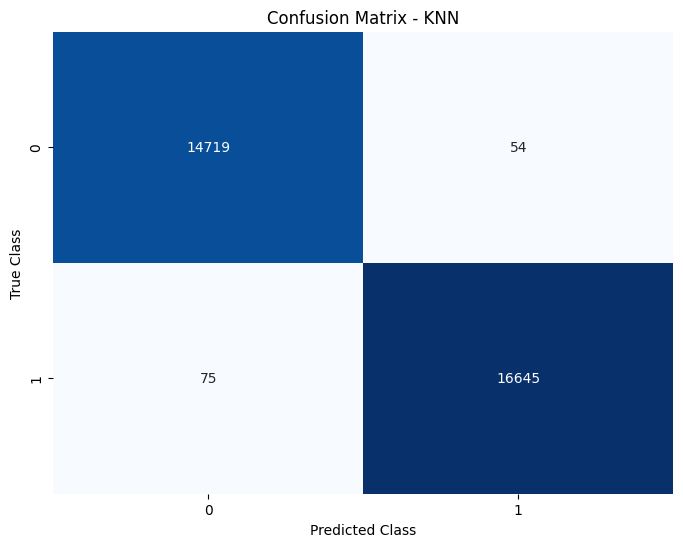

Confusion Matrix for Backpropagation
[[14344   429]
 [  629 16091]]



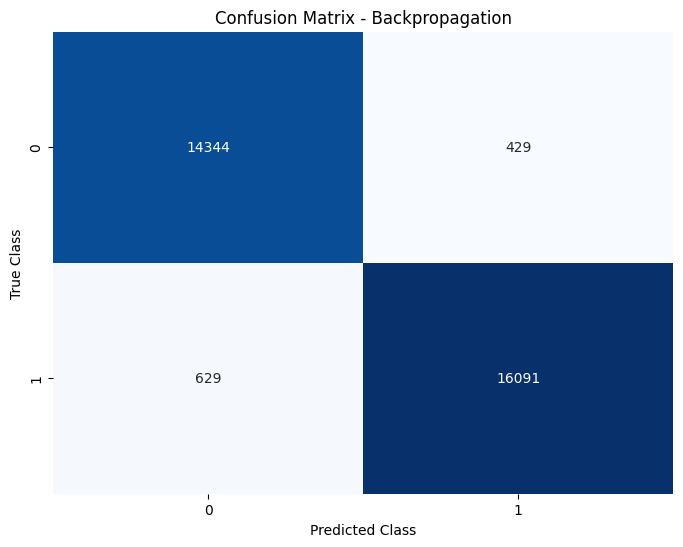

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of models and their predictions
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'KNN', 'Backpropagation']
predictions = [dt_predictions, nb_predictions, svm_predictions, knn_predictions, bp_predictions]

# Calculate the confusion matrix for each model
confusion_matrices = []
for model, preds in zip(models, predictions):
    cm = confusion_matrix(y_test, preds)
    confusion_matrices.append((model, cm))

# Display the confusion matrices
for model, cm in confusion_matrices:
    print("Confusion Matrix for", model)
    print(cm)
    print()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

### **C) Analysing the result by F1, Precision, Recall, Classification Report and ROC curve evaluation criteria**

Evaluation Metrics for Decision Tree
--------------------------------------
Confusion Matrix:
[[14737    36]
 [   27 16693]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14773
           1       1.00      1.00      1.00     16720

    accuracy                           1.00     31493
   macro avg       1.00      1.00      1.00     31493
weighted avg       1.00      1.00      1.00     31493


F1 Score: 0.998
Precision: 0.998
Recall: 0.998

AUC Score: 0.9979741446878552



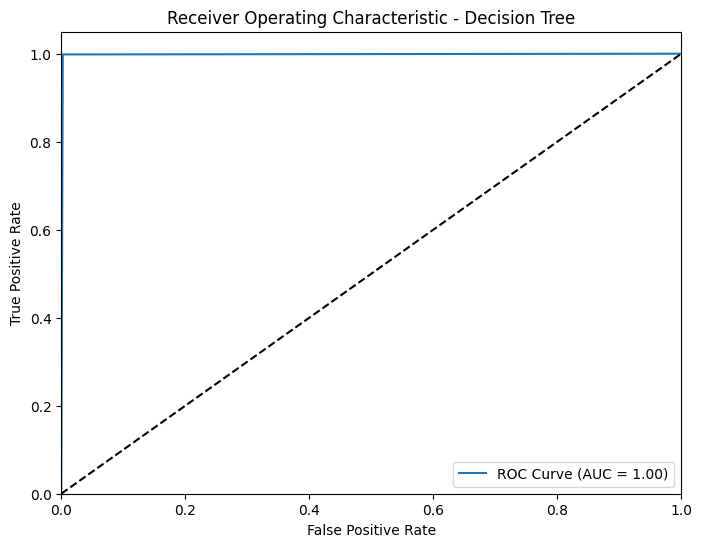

------------------------------------------------------------------

Evaluation Metrics for Naive Bayes
--------------------------------------
Confusion Matrix:
[[  245 14528]
 [  272 16448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.02      0.03     14773
           1       0.53      0.98      0.69     16720

    accuracy                           0.53     31493
   macro avg       0.50      0.50      0.36     31493
weighted avg       0.50      0.53      0.38     31493


F1 Score: 0.3812
Precision: 0.5042
Recall: 0.5301

AUC Score: 0.5001581833145105



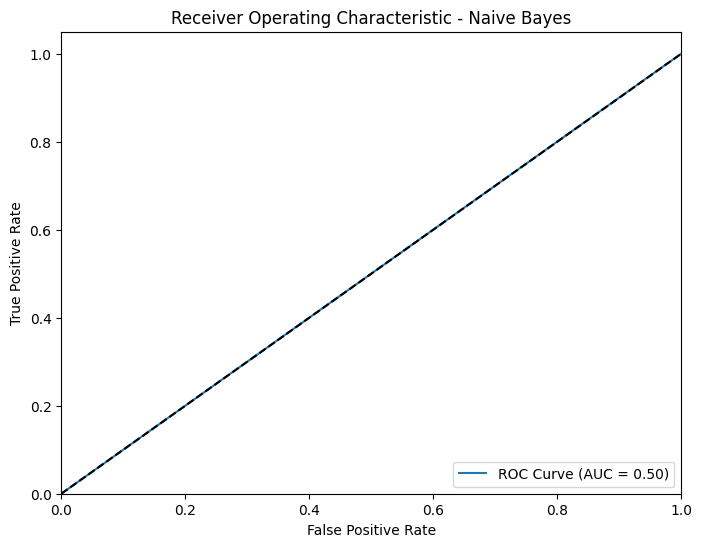

------------------------------------------------------------------

Evaluation Metrics for SVM
--------------------------------------
Confusion Matrix:
[[   23 14750]
 [    5 16715]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.00      0.00     14773
           1       0.53      1.00      0.69     16720

    accuracy                           0.53     31493
   macro avg       0.68      0.50      0.35     31493
weighted avg       0.67      0.53      0.37     31493


F1 Score: 0.3698
Precision: 0.6674
Recall: 0.5315

AUC Score: 0.5006289256360287



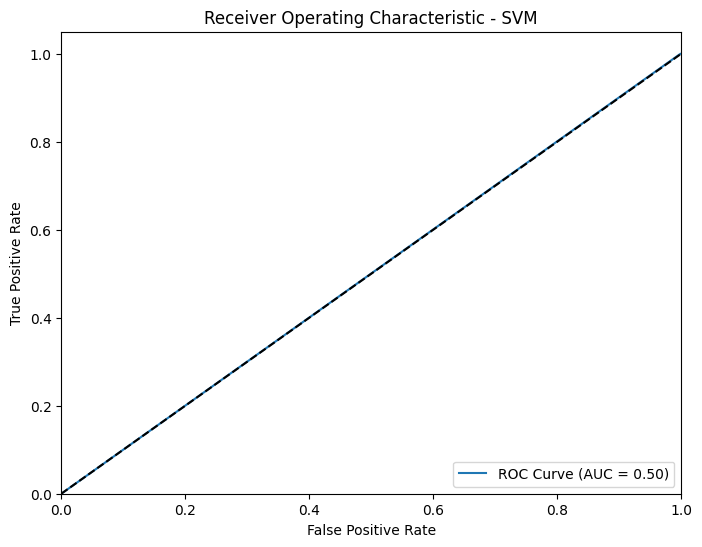

------------------------------------------------------------------

Evaluation Metrics for KNN
--------------------------------------
Confusion Matrix:
[[14719    54]
 [   75 16645]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14773
           1       1.00      1.00      1.00     16720

    accuracy                           1.00     31493
   macro avg       1.00      1.00      1.00     31493
weighted avg       1.00      1.00      1.00     31493


F1 Score: 0.9959
Precision: 0.9959
Recall: 0.9959

AUC Score: 0.9959295184671892



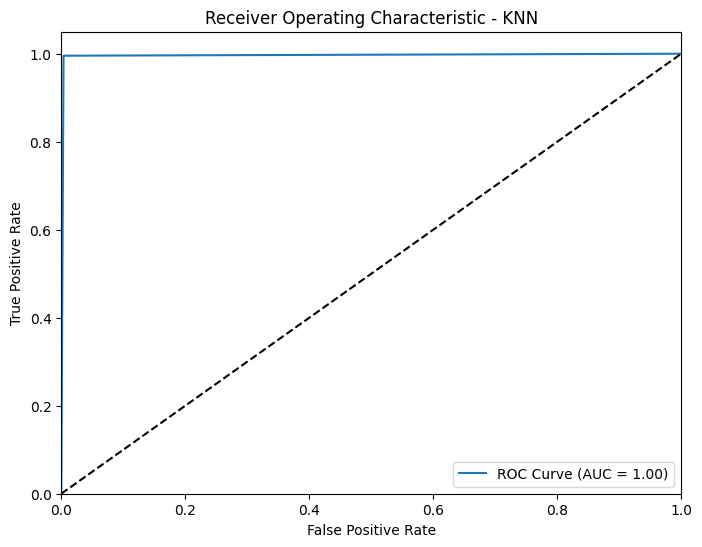

------------------------------------------------------------------

Evaluation Metrics for Backpropagation
--------------------------------------
Confusion Matrix:
[[14344   429]
 [  629 16091]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14773
           1       0.97      0.96      0.97     16720

    accuracy                           0.97     31493
   macro avg       0.97      0.97      0.97     31493
weighted avg       0.97      0.97      0.97     31493


F1 Score: 0.9664
Precision: 0.9665
Recall: 0.9664

AUC Score: 0.9666704594441495



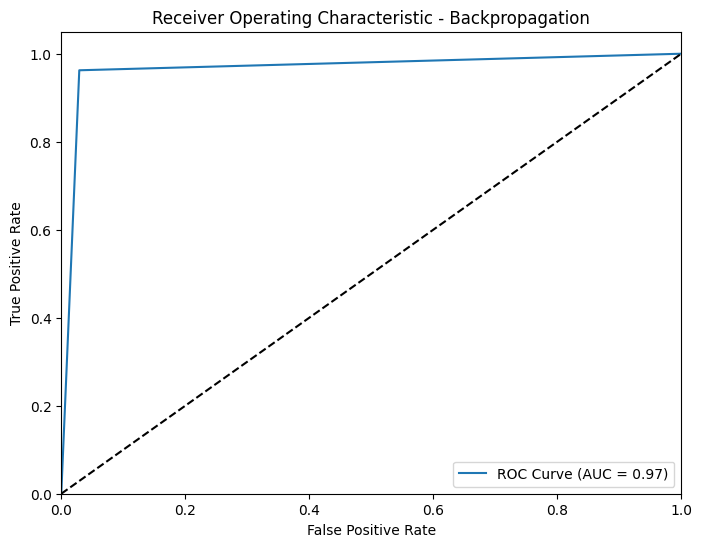

------------------------------------------------------------------



In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the list of models and their predictions
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'KNN', 'Backpropagation']
predictions = [dt_predictions, nb_predictions, svm_predictions, knn_predictions, bp_predictions]

# Calculate evaluation metrics for each model
for model, preds in zip(models, predictions):
    print("Evaluation Metrics for", model)
    print('--------------------------------------')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, preds)
    print("Confusion Matrix:")
    print(cm)
    print()

    # Calculate classification report
    report = classification_report(y_test, preds)
    print("Classification Report:")
    print(report)
    print()

    # Calculate F1 score, precision, and recall
    f1 = np.round(f1_score(y_test, preds, average='weighted'), 4)
    precision = np.round(precision_score(y_test, preds, average='weighted'), 4)
    recall = np.round(recall_score(y_test, preds, average='weighted'), 4)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print()

    # Calculate ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    print("AUC Score:", auc)
    print()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - ' + model)
    plt.legend(loc="lower right")
    plt.show()
    print('------------------------------------------------------------------\n')


## **Train Model with Data pre-prccessing**

### **D) Preprocess Dataset and Splitting the dataset into training and testing sets**

In [ ]:
#Load Dataset
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv(r'/content/drive/MyDrive/NSL-KDD.arff')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Check for missing values
data.isnull().sum()

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
dtype: int64

In [ ]:
data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
# Drop any duplicate rows, if present
data.drop_duplicates(inplace=True)

In [ ]:
data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Perform label encoding on categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

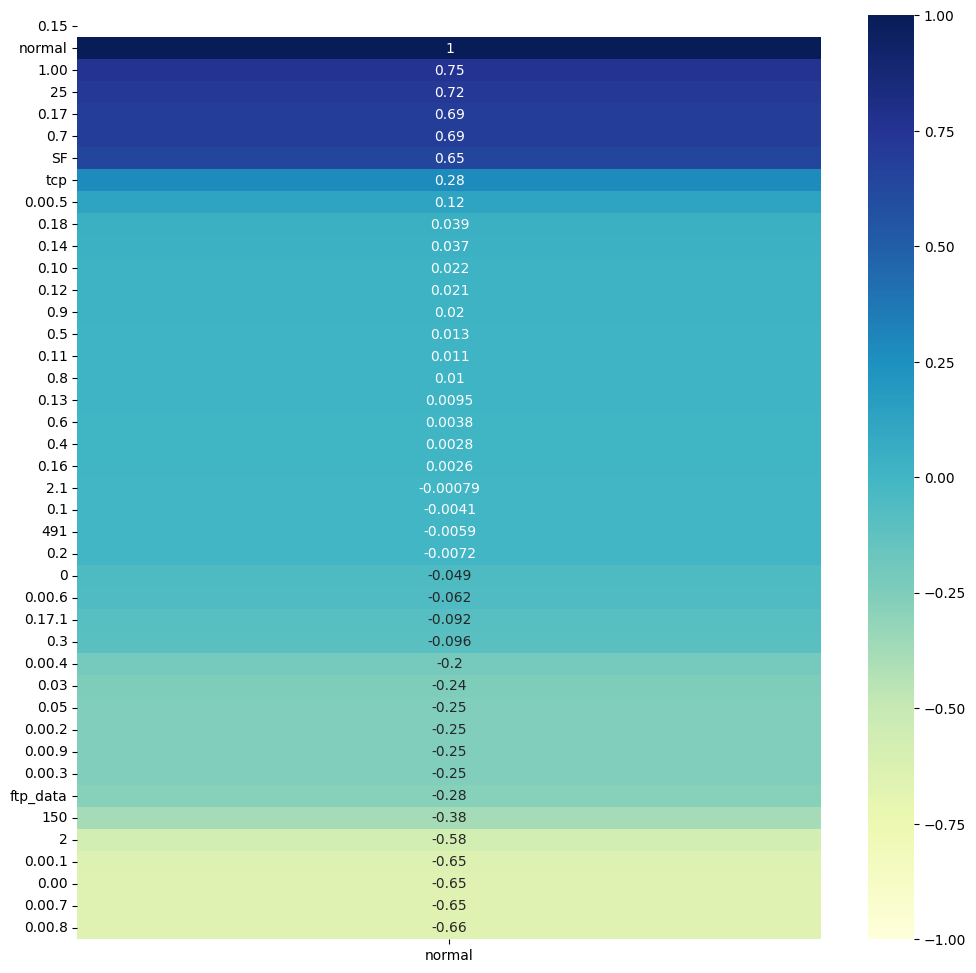

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Draw correlation martix
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr()[['normal']].sort_values('normal'),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [ ]:
# Set the threshold for correlation
correlation_threshold = 0.2

# Identify the features with low correlation to the target variable
low_correlation_features = correlation_matrix[abs(correlation_matrix['normal']) < correlation_threshold].index

# Remove the low correlation features from the dataset
preprocessed_data = data.drop(columns=low_correlation_features)


# Print the remaining features after removing the irrelevant ones
print("Remaining features after removing irrelevant features:")
print(preprocessed_data.columns)

Remaining features after removing irrelevant features:
Index(['tcp', 'ftp_data', 'SF', '0.7', '0.15', '2', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '150', '25', '0.17', '0.03', '0.00.7',
       '0.00.8', '0.05', '0.00.9', 'normal'],
      dtype='object')


In [ ]:
preprocessed_data

,tcp,ftp_data,SF,0.7,0.15,2,0.00,0.00.1,0.00.2,0.00.3,...,0.00.4,150,25,0.17,0.03,0.00.7,0.00.8,0.05,0.00.9,normal
0,2,44,9,0,0,13,0.0,0.0,0.0,0.0,...,0.15,255,1,0.00,0.60,0.00,0.00,0.00,0.00,1
1,1,49,5,0,0,123,1.0,1.0,0.0,0.0,...,0.07,255,26,0.10,0.05,1.00,1.00,0.00,0.00,0
2,1,24,9,1,0,5,0.2,0.2,0.0,0.0,...,0.00,30,255,1.00,0.00,0.03,0.01,0.00,0.01,1
3,1,24,9,1,0,30,0.0,0.0,0.0,0.0,...,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1
4,1,49,1,0,0,121,0.0,0.0,1.0,1.0,...,0.06,255,19,0.07,0.07,0.00,0.00,1.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,49,5,0,0,184,1.0,1.0,0.0,0.0,...,0.06,255,25,0.10,0.06,1.00,1.00,0.00,0.00,0
125968,2,49,9,0,0,2,0.0,0.0,0.0,0.0,...,0.00,255,244,0.96,0.01,0.00,0.00,0.00,0.00,1
125969,1,54,9,1,0,1,0.0,0.0,0.0,0.0,...,0.00,255,30,0.12,0.06,0.72,0.00,0.01,0.00,1
125970,1,30,5,0,0,144,1.0,1.0,0.0,0.0,...,0.05,255,8,0.03,0.05,1.00,1.00,0.00,0.00,0


In [ ]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = preprocessed_data.iloc[:, :-1]  # Features (all columns except the last one)
y = preprocessed_data.iloc[:, -1]   # Target variable (last column)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shape of the training and testing sets
print("Training data shape:", X_train_.shape)
print("Testing data shape:", X_test_.shape)

Training data shape: (94472, 20)
Testing data shape: (31491, 20)


In [ ]:
# Perform feature scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test_)

print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train_.shape)
print("Shape of y_test:", y_test_.shape)

Shape of X_train: (94472, 20)
Shape of X_test: (31491, 20)
Shape of y_train: (94472,)
Shape of y_test: (31491,)


In [ ]:
# Print the preprocessed dataset
print("Preprocessed Dataset:")
dff = pd.DataFrame(X_train_scaled)

dff

Preprocessed Dataset:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.5,0.710145,0.1,0.0,0.0,0.111546,0.00,0.00,1.0,1.0,0.35,0.07,1.000000,0.074803,0.08,0.06,0.00,0.0,1.0,1.0
1,0.5,0.536232,0.5,0.0,0.0,0.373777,1.00,1.00,0.0,0.0,0.07,0.06,1.000000,0.047244,0.05,0.07,1.00,1.0,0.0,0.0
2,0.5,0.347826,0.9,1.0,0.0,0.045010,0.04,0.04,0.0,0.0,1.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.0,0.0,0.0
3,0.5,0.289855,0.9,1.0,0.0,0.003914,0.00,0.00,0.0,0.0,1.00,0.00,0.437008,0.244094,0.32,0.03,0.00,0.0,0.0,0.0
4,0.5,0.710145,0.1,0.0,0.0,0.203523,0.00,0.00,1.0,1.0,0.12,0.08,1.000000,0.043307,0.05,0.07,0.00,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94467,0.5,0.347826,0.5,0.0,0.0,0.459883,1.00,1.00,0.0,0.0,0.02,0.06,1.000000,0.015748,0.02,0.06,1.00,1.0,0.0,0.0
94468,0.5,0.782609,0.9,1.0,0.0,0.001957,0.00,0.00,0.0,0.0,1.00,0.00,0.393701,0.866142,0.96,0.02,0.00,0.0,0.0,0.0
94469,0.5,0.347826,0.9,1.0,0.0,0.007828,0.00,0.00,0.0,0.0,1.00,0.00,1.000000,0.952756,0.95,0.01,0.00,0.0,0.0,0.0
94470,1.0,0.173913,0.9,0.0,0.0,0.003914,0.00,0.00,0.0,0.0,1.00,0.00,0.657480,0.814961,1.00,0.00,0.00,0.0,0.0,0.0


### **E) Perdorming A, B and C steps on Preproccesed dataset**

**Perdorming A step on Preproccesed Dataset: Training the model using DecisionTree, BayesClassification, SVM, KNN and BackPropagation algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create instances of the classifiers
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
backpropagation = MLPClassifier()

# Train the models
decision_tree.fit(X_train_scaled, y_train_)
naive_bayes.fit(X_train_scaled, y_train_)
svm.fit(X_train_scaled, y_train_)
knn.fit(X_train_scaled, y_train_)
backpropagation.fit(X_train_scaled, y_train_)

# Make predictions on the test set
dt_predictions = decision_tree.predict(X_test_scaled)
nb_predictions = naive_bayes.predict(X_test_scaled)
svm_predictions = svm.predict(X_test_scaled)
knn_predictions = knn.predict(X_test_scaled)
bp_predictions = backpropagation.predict(X_test_scaled)

#Calculating the Accuracy Score of each prediction
dt_accuracy = accuracy_score(y_test_, dt_predictions)
nb_accuracy = accuracy_score(y_test_, nb_predictions)
svm_accuracy = accuracy_score(y_test_, svm_predictions)
knn_accuracy = accuracy_score(y_test_, knn_predictions)
bp_accuracy = accuracy_score(y_test_, bp_predictions)

#Printing the Accuracy Score of each prediction
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Backpropagation Accuracy:", bp_accuracy)

Decision Tree Accuracy: 0.9935219586548538
Naive Bayes Accuracy: 0.879838684068464
SVM Accuracy: 0.9789781207329078
KNN Accuracy: 0.9926010606204947
Backpropagation Accuracy: 0.990886284970309


**Perdorming B step on Preproccesed Dataset: Displaying ConfusionMatrix foe each model**

Confusion Matrix for Decision Tree
[[14675    86]
 [  118 16612]]



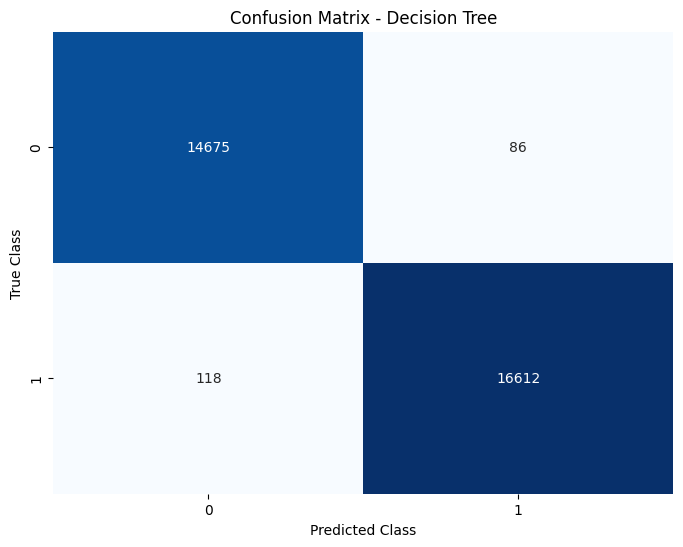

Confusion Matrix for Naive Bayes
[[12537  2224]
 [ 1560 15170]]



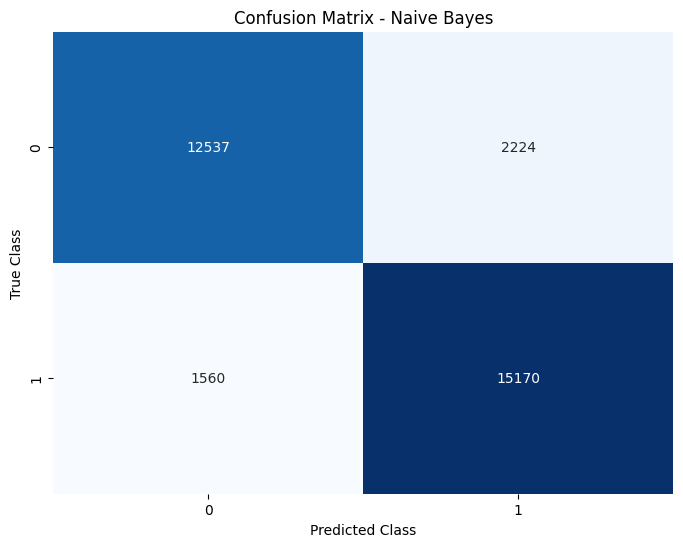

Confusion Matrix for SVM
[[14238   523]
 [  139 16591]]



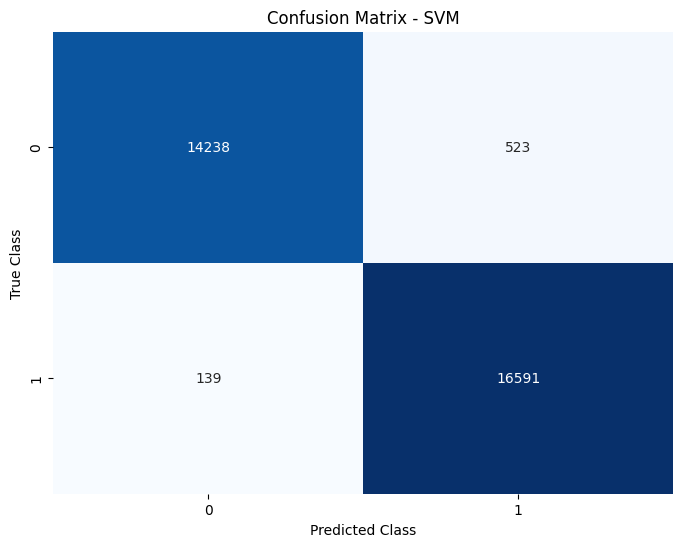

Confusion Matrix for KNN
[[14643   118]
 [  115 16615]]



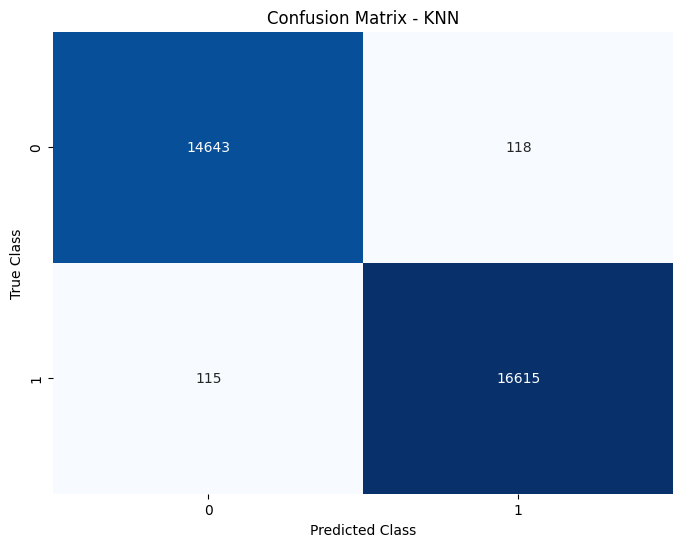

Confusion Matrix for Backpropagation
[[14613   148]
 [  139 16591]]



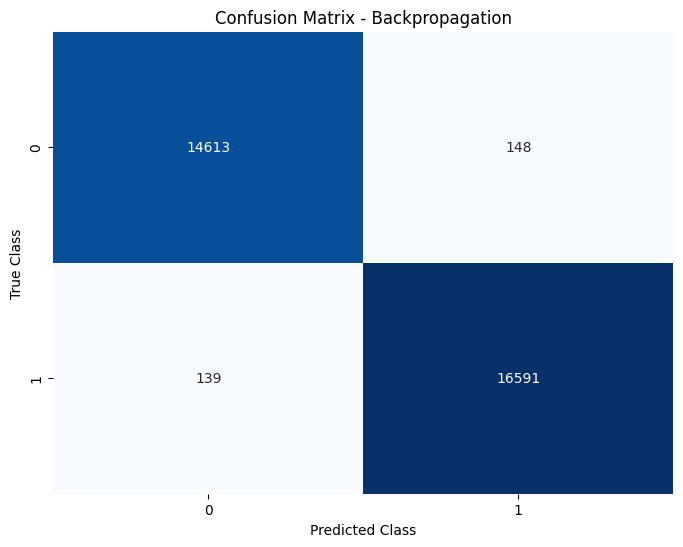

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of models and their predictions
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'KNN', 'Backpropagation']
predictions = [dt_predictions, nb_predictions, svm_predictions, knn_predictions, bp_predictions]

# Calculate the confusion matrix for each model
confusion_matrices = []
for model, preds in zip(models, predictions):
    cm = confusion_matrix(y_test_, preds)
    confusion_matrices.append((model, cm))

# Display the confusion matrices
for model, cm in confusion_matrices:
    print("Confusion Matrix for", model)
    print(cm)
    print()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

Evaluation Metrics for Decision Tree
--------------------------------------
Confusion Matrix:
[[14675    86]
 [  118 16612]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14761
           1       0.99      0.99      0.99     16730

    accuracy                           0.99     31491
   macro avg       0.99      0.99      0.99     31491
weighted avg       0.99      0.99      0.99     31491


F1 Score: 0.9935
Precision: 0.9935
Recall: 0.9935

AUC Score: 0.9935603193063837



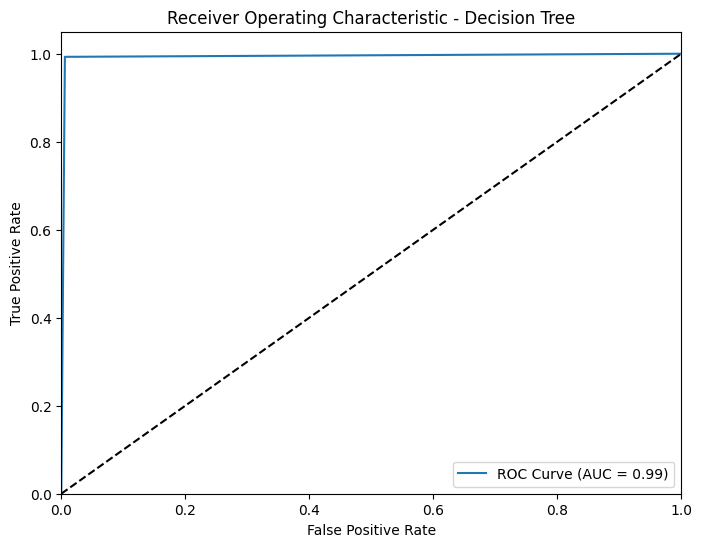

------------------------------------------------------------------

Evaluation Metrics for Naive Bayes
--------------------------------------
Confusion Matrix:
[[12537  2224]
 [ 1560 15170]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     14761
           1       0.87      0.91      0.89     16730

    accuracy                           0.88     31491
   macro avg       0.88      0.88      0.88     31491
weighted avg       0.88      0.88      0.88     31491


F1 Score: 0.8796
Precision: 0.8802
Recall: 0.8798

AUC Score: 0.8780435172845457



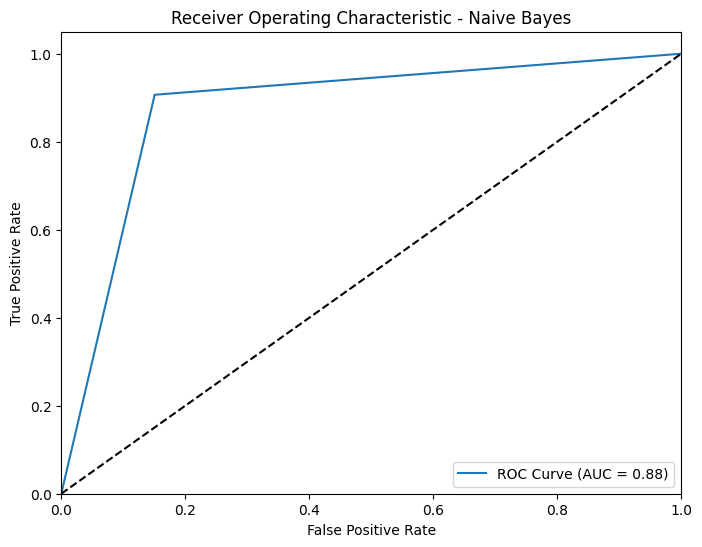

------------------------------------------------------------------

Evaluation Metrics for SVM
--------------------------------------
Confusion Matrix:
[[14238   523]
 [  139 16591]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     14761
           1       0.97      0.99      0.98     16730

    accuracy                           0.98     31491
   macro avg       0.98      0.98      0.98     31491
weighted avg       0.98      0.98      0.98     31491


F1 Score: 0.979
Precision: 0.9792
Recall: 0.979

AUC Score: 0.9781301840891611



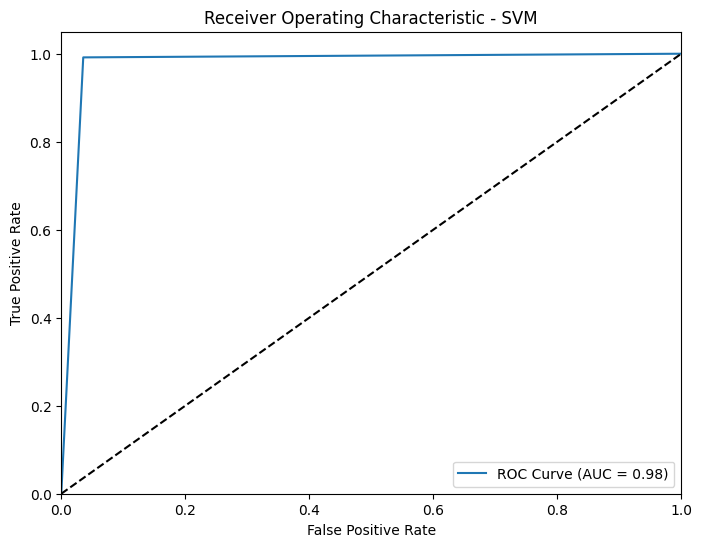

------------------------------------------------------------------

Evaluation Metrics for KNN
--------------------------------------
Confusion Matrix:
[[14643   118]
 [  115 16615]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14761
           1       0.99      0.99      0.99     16730

    accuracy                           0.99     31491
   macro avg       0.99      0.99      0.99     31491
weighted avg       0.99      0.99      0.99     31491


F1 Score: 0.9926
Precision: 0.9926
Recall: 0.9926

AUC Score: 0.9925660411984489



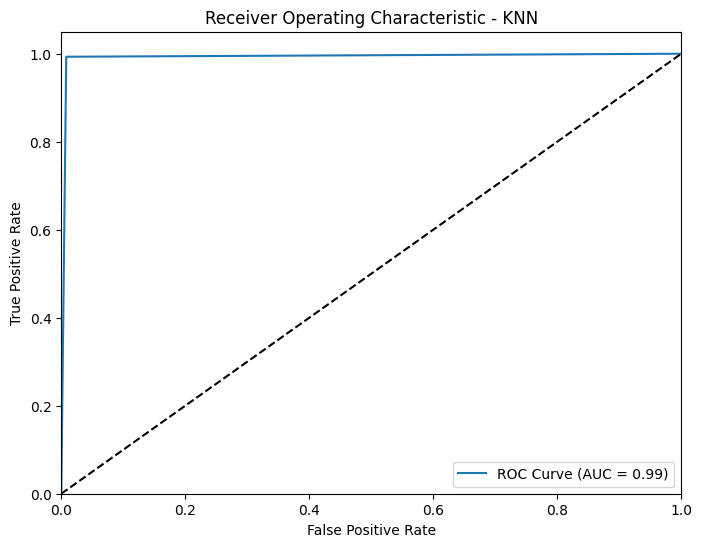

------------------------------------------------------------------

Evaluation Metrics for Backpropagation
--------------------------------------
Confusion Matrix:
[[14613   148]
 [  139 16591]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14761
           1       0.99      0.99      0.99     16730

    accuracy                           0.99     31491
   macro avg       0.99      0.99      0.99     31491
weighted avg       0.99      0.99      0.99     31491


F1 Score: 0.9909
Precision: 0.9909
Recall: 0.9909

AUC Score: 0.9908325755260556



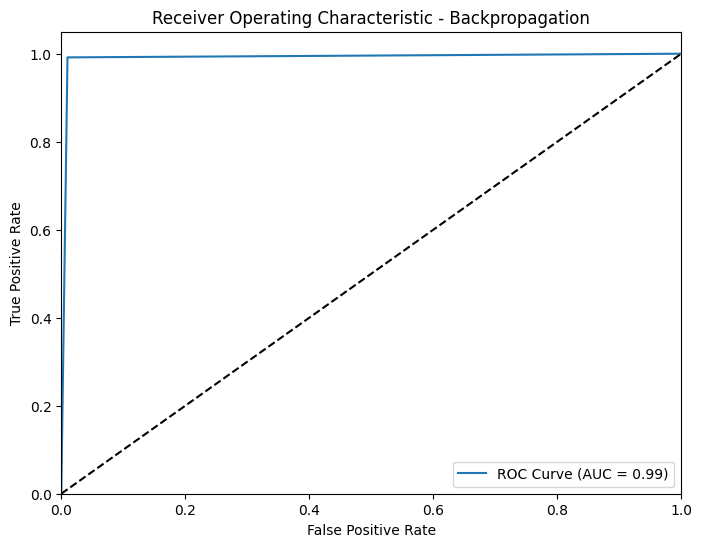

------------------------------------------------------------------



In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the list of models and their predictions
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'KNN', 'Backpropagation']
predictions = [dt_predictions, nb_predictions, svm_predictions, knn_predictions, bp_predictions]

# Calculate evaluation metrics for each model
for model, preds in zip(models, predictions):
    print("Evaluation Metrics for", model)
    print('--------------------------------------')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_, preds)
    print("Confusion Matrix:")
    print(cm)
    print()

    # Calculate classification report
    report = classification_report(y_test_, preds)
    print("Classification Report:")
    print(report)
    print()

    # Calculate F1 score, precision, and recall
    f1 = np.round(f1_score(y_test_, preds, average='weighted'), 4)
    precision = np.round(precision_score(y_test_, preds, average='weighted'), 4)
    recall = np.round(recall_score(y_test_, preds, average='weighted'), 4)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print()

    # Calculate ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_, preds)
    auc = roc_auc_score(y_test_, preds)
    print("AUC Score:", auc)
    print()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - ' + model)
    plt.legend(loc="lower right")
    plt.show()
    print('------------------------------------------------------------------\n')


### **F) Dimensionality reduction using PCA and check the result with dimensionality reduction**

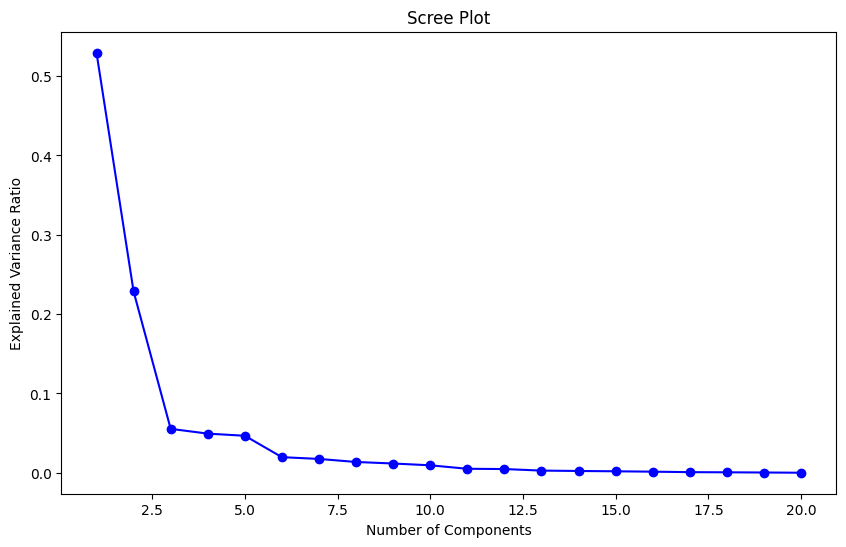

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the fitted PCA
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
n_components = 6

In [ ]:
# Transform the data
X_train_reduced = X_train_pca[:, :n_components]
X_test_reduced = X_test_pca[:, :n_components]

In [ ]:
# Print the preprocessed dataset
print("Preprocessed Dataset:")
reduced_df = pd.DataFrame(X_train_reduced)

reduced_df

Preprocessed Dataset:


,0,1,2,3,4,5
0,0.300427,2.050183,0.084719,-0.139819,0.208439,-0.137596
1,1.733913,-0.414229,0.046227,-0.080702,0.022038,0.026672
2,-1.007429,-0.374119,-0.209719,-0.260872,0.448932,0.037844
3,-0.694988,-0.137047,0.190504,0.628278,0.161382,0.143049
4,0.411091,2.089555,0.083508,-0.135307,0.254861,-0.016392
...,...,...,...,...,...,...
94467,1.765807,-0.404798,0.021330,-0.106574,-0.009621,0.180897
94468,-1.064554,-0.333964,0.258300,0.057995,0.221537,-0.196767
94469,-1.009150,-0.341544,-0.217331,-0.188221,0.451072,0.036544
94470,-0.764325,-0.135257,-0.541305,-0.241246,-0.536300,-0.250531


In [ ]:
from sklearn import metrics

# Train the models on the PCA-transformed data
decision_tree_pca = DecisionTreeClassifier()
naive_bayes_pca = GaussianNB()
svm_pca = SVC()
knn_pca = KNeighborsClassifier()
backpropagation_pca = MLPClassifier()

decision_tree_pca.fit(X_train_reduced, y_train_)
naive_bayes_pca.fit(X_train_reduced, y_train_)
svm_pca.fit(X_train_reduced, y_train_)
knn_pca.fit(X_train_reduced, y_train_)
backpropagation_pca.fit(X_train_reduced, y_train_)

# Evaluate the models on the PCA-transformed test data
preds_dt_pca = decision_tree_pca.predict(X_test_reduced)
preds_nb_pca = naive_bayes_pca.predict(X_test_reduced)
preds_svm_pca = svm_pca.predict(X_test_reduced)
preds_knn_pca = knn_pca.predict(X_test_reduced)
preds_bp_pca = backpropagation_pca.predict(X_test_reduced)

# Calculate evaluation metrics for PCA-transformed data
f1_score_pca_dt = metrics.f1_score(y_test_, preds_dt_pca, average='weighted')
f1_score_pca_nb = metrics.f1_score(y_test_, preds_nb_pca, average='weighted')
f1_score_pca_svm = metrics.f1_score(y_test_, preds_svm_pca, average='weighted')
f1_score_pca_knn = metrics.f1_score(y_test_, preds_knn_pca, average='weighted')
f1_score_pca_bp = metrics.f1_score(y_test_, preds_bp_pca, average='weighted')

precision_pca_dt = metrics.precision_score(y_test_, preds_dt_pca, average='weighted')
precision_pca_nb = metrics.precision_score(y_test_, preds_nb_pca, average='weighted')
precision_pca_svm = metrics.precision_score(y_test_, preds_svm_pca, average='weighted')
precision_pca_knn = metrics.precision_score(y_test_, preds_knn_pca, average='weighted')
precision_pca_bp = metrics.precision_score(y_test_, preds_bp_pca, average='weighted')

recall_pca_dt = metrics.recall_score(y_test_, preds_dt_pca, average='weighted')
recall_pca_nb = metrics.recall_score(y_test_, preds_nb_pca, average='weighted')
recall_pca_svm = metrics.recall_score(y_test_, preds_svm_pca, average='weighted')
recall_pca_knn = metrics.recall_score(y_test_, preds_knn_pca, average='weighted')
recall_pca_bp = metrics.recall_score(y_test_, preds_bp_pca, average='weighted')

# Print the evaluation metrics for PCA-transformed data
print("Evaluation Metrics for Decision Tree with PCA")
print("---------------------------------------------")
print("F1 Score:", f1_score_pca_dt)
print("Precision:", precision_pca_dt)
print("Recall:", recall_pca_dt)
print()

print("Evaluation Metrics for Naive Bayes with PCA")
print("-------------------------------------------")
print("F1 Score:", f1_score_pca_nb)
print("Precision:", precision_pca_nb)
print("Recall:", recall_pca_nb)
print()

print("Evaluation Metrics for SVM with PCA")
print("-----------------------------------")
print("F1 Score:", f1_score_pca_svm)
print("Precision:", precision_pca_svm)
print("Recall:", recall_pca_svm)
print()

print("Evaluation Metrics for KNN with PCA")
print("-----------------------------------")
print("F1 Score:", f1_score_pca_knn)
print("Precision:", precision_pca_knn)
print("Recall:", recall_pca_knn)
print()

print("Evaluation Metrics for Backpropagation with PCA")
print("-----------------------------------------------")
print("F1 Score:", f1_score_pca_bp)
print("Precision:", precision_pca_bp)
print("Recall:", recall_pca_bp)
print()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluation Metrics for Decision Tree with PCA
---------------------------------------------
F1 Score: 0.9890771388749846
Precision: 0.9890815648327249
Recall: 0.989076244006224

Evaluation Metrics for Naive Bayes with PCA
-------------------------------------------
F1 Score: 0.9049690519440329
Precision: 0.9115438836680338
Recall: 0.9057190943444159

Evaluation Metrics for SVM with PCA
-----------------------------------
F1 Score: 0.9699741333255336
Precision: 0.9706895541034387
Recall: 0.9700231812263821

Evaluation Metrics for KNN with PCA
-----------------------------------
F1 Score: 0.9898705015384102
Precision: 0.9898716047981307
Recall: 0.9898701216220508

Evaluation Metrics for Backpropagation with PCA
-----------------------------------------------
F1 Score: 0.9824956238108867
Precision: 0.9825609892273525
Recall: 0.9825029373471785



### **G) Comparing the excution time of the algorithms**

**Measuring execution time for Decision Tree**

In [ ]:
import time

In [ ]:
# Measure execution time for Decision Tree Before Pre-proccessing
start_time = time.time()
decision_tree.fit(X_train, y_train)
end_time = time.time()
execution_time_dt_BP = end_time - start_time

# Measure execution time for Decision Tree After Pre-proccessing
start_time = time.time()
decision_tree.fit(X_train_scaled, y_train_)
end_time = time.time()
execution_time_dt_AP = end_time - start_time

# Measure execution time for Decision Tree After Dimensionality Reduction
start_time = time.time()
decision_tree.fit(X_train_reduced, y_train_)
end_time = time.time()
execution_time_dt_ADR = end_time - start_time

**Measuring execution time for Naive Bayes**

In [ ]:
# Measure execution time for Naive Bayes Before Pre-proccessing
start_time = time.time()
naive_bayes.fit(X_train, y_train)
end_time = time.time()
execution_time_nb_BP = end_time - start_time

# Measure execution time for Naive Bayes After Pre-proccessing
start_time = time.time()
naive_bayes.fit(X_train_scaled, y_train_)
end_time = time.time()
execution_time_nb_AP = end_time - start_time

# Measure execution time for Naive Bayes After Dimensionality Reduction
start_time = time.time()
naive_bayes.fit(X_train_reduced, y_train_)
end_time = time.time()
execution_time_nb_ADR = end_time - start_time

**Measuring execution time for SVM**

In [ ]:
# Measure execution time for SVM Before Pre-proccessing
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()
execution_time_svm_BP = end_time - start_time

# Measure execution time for SVM After Pre-proccessing
start_time = time.time()
svm.fit(X_train_scaled, y_train_)
end_time = time.time()
execution_time_svm_AP = end_time - start_time

# Measure execution time for SVM After Dimensionality Reduction
start_time = time.time()
svm.fit(X_train_reduced, y_train_)
end_time = time.time()
execution_time_svm_ADR = end_time - start_time

**Measuring execution time for KNN**

In [ ]:
# Measure execution time for KNN Before Pre-proccessing
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
execution_time_knn_BP = end_time - start_time

# Measure execution time for KNN After Pre-proccessing
start_time = time.time()
knn.fit(X_train_scaled, y_train_)
end_time = time.time()
execution_time_knn_AP = end_time - start_time

# Measure execution time for KNN After Dimensionality Reduction
start_time = time.time()
knn.fit(X_train_reduced, y_train_)
end_time = time.time()
execution_time_knn_ADR = end_time - start_time

**Measuring execution time for Backpropagation**

In [ ]:
# Measure execution time for Backpropagation Before Pre-proccessing
start_time = time.time()
backpropagation.fit(X_train, y_train)
end_time = time.time()
execution_time_bp_BP = end_time - start_time

# Measure execution time for Backpropagation After Pre-proccessing
start_time = time.time()
backpropagation.fit(X_train_scaled, y_train_)
end_time = time.time()
execution_time_bp_AP = end_time - start_time

# Measure execution time for Backpropagation After Dimensionality Reduction
start_time = time.time()
backpropagation.fit(X_train_reduced, y_train_)
end_time = time.time()
execution_time_bp_ADR = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Printing the Execution Time for each Algorithm**

In [ ]:
print("Execution Time - Decision Tree - Before Preproccessing: ", execution_time_dt_BP)
print("Execution Time - Decision Tree - After Preproccessing: ", execution_time_dt_AP)
print("Execution Time - Decision Tree - After Dimensionality Reduction: ", execution_time_dt_ADR)
print('------------------------------------------------------------------------------------------\n')

print("Execution Time - Naive Bayes - Before Preproccessing: ", execution_time_nb_BP)
print("Execution Time - Naive Bayes - After Preproccessing: ", execution_time_nb_AP)
print("Execution Time - Naive Bayes - After Dimensionality Reduction: ", execution_time_nb_ADR)
print('------------------------------------------------------------------------------------------\n')

print("Execution Time - SVM - Before Preproccessing: ", execution_time_svm_BP)
print("Execution Time - SVM - After Preproccessing: ", execution_time_svm_AP)
print("Execution Time - SVM - After Dimensionality Reduction: ", execution_time_svm_ADR)
print('------------------------------------------------------------------------------------------\n')

print("Execution Time - KNN - Before Preproccessing: ", execution_time_knn_BP)
print("Execution Time - KNN - After Preproccessing: ", execution_time_knn_AP)
print("Execution Time - KNN - After Dimensionality Reduction: ", execution_time_knn_ADR)
print('------------------------------------------------------------------------------------------\n')

print("Execution Time - Backpropagation - Before Preproccessing: ", execution_time_bp_BP)
print("Execution Time - Backpropagation - After Preproccessing: ", execution_time_bp_AP)
print("Execution Time - Backpropagation - After Dimensionality Reduction: ", execution_time_bp_ADR)
print('------------------------------------------------------------------------------------------\n')


Execution Time - Decision Tree - Before Preproccessing:  1.074937105178833
Execution Time - Decision Tree - After Preproccessing:  0.47327423095703125
Execution Time - Decision Tree - After Dimensionality Reduction:  1.7872850894927979
------------------------------------------------------------------------------------------

Execution Time - Naive Bayes - Before Preproccessing:  0.07550477981567383
Execution Time - Naive Bayes - After Preproccessing:  0.03243255615234375
Execution Time - Naive Bayes - After Dimensionality Reduction:  0.019058704376220703
------------------------------------------------------------------------------------------

Execution Time - SVM - Before Preproccessing:  1157.92924451828
Execution Time - SVM - After Preproccessing:  51.82154846191406
Execution Time - SVM - After Dimensionality Reduction:  41.47135019302368
------------------------------------------------------------------------------------------

Execution Time - KNN - Before Preproccessing:  0.040